In [42]:
#conv Neural Network
# tensorboard --logdir=/home/ncc/notebook/learn/tensorboard/log
"""
created by kim Seong jung

"""
import numpy as np 
import tensorflow as tf
import re

import math
import time
import matplotlib.pyplot as plt
%matplotlib inline
import os 

In [43]:
import sklearn

In [44]:


file_locate='/home/seongjung/바탕화면/Numpy_ASAN/Mal_vs_Benign/100_100/0/0/'
test_img = np.load(file_locate+'val_img.npy')
test_lab = np.load(file_locate+'val_lab.npy')


"""val_img =np.load(file_locate+'val_img.npy')
test_img = np.concatenate((val_img , test_img) , axis=0 )
test_lab = np.load(file_locate+'test_lab.npy')
val_lab =np.load(file_locate+'val_lab.npy')
test_lab = np.concatenate((val_lab , test_lab) , axis=0 )
"""

print np.shape(test_img)

print np.shape(test_lab)
img_row =100
img_col=100
    
divide_flag= False
restore_flag =True
#2_4
#model_save_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/0_0/'
restore_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/0_0/'
name=restore_path.split('/')[-2]
batch_size=30
print img_row ,img_col
n_classes =2
in_ch =3
out_ch1=200
out_ch2=200
out_ch3=200
out_ch4=200
out_ch5=200


fully_ch1=1024
fully_ch2 =1024
fully_ch3 =1024



strides_1=[1,2,2,1]
strides_2=[1,1,1,1]
strides_3=[1,1,1,1]
strides_4=[1,1,1,1]
strides_5=[1,1,1,1]


x= tf.placeholder("float",shape=[None,img_col , img_row , 3],  name = 'x-input')
#y_=tf.placeholder("float",shape=[None , n_classes] , name = 'y-input')
keep_prob = tf.placeholder("float")

x_image= tf.reshape(x,[-1,img_row,img_col,3])

iterate=100000



weight_row =3 ; weight_col=3



print img_col , img_row

(38, 100, 100, 3)
(38, 2)
100 100
100 100


# Restore Weight and Bias

In [45]:
"""def weight_variable(name,shape):
    #initial = tf.truncated_normal(shape , stddev=0.1)
    initial = tf.get_variable(name,shape=shape , initializer = tf.contrib.layers.xavier_initializer())
    return tf.Variable(initial)"""
with tf.device('/gpu:0'):
    def bias_variable(shape):
        initial = tf.constant(0.1 , shape=shape)
        return tf.Variable(initial)



In [46]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y


In [47]:
with tf.device('/gpu:0'):

    def conv2d(x,w,strides_):
        return tf.nn.conv2d(x,w, strides = strides_, padding='SAME')
    def max_pool_2x2(x):
        return tf.nn.max_pool(x , ksize=[1,2,2,1] ,strides = [1,2,2,1] , padding = 'SAME')

In [48]:
if restore_flag==False:
    with tf.variable_scope("layer1") as scope:
        try:
            w_conv1 = tf.get_variable("W1",[weight_row,weight_col,3,out_ch1] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv1 = tf.get_variable("W1",[weight_row,weight_col,3,out_ch1] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope("layer1") as scope:
        try:
            b_conv1 = bias_variable([out_ch1])
        except:
            scope.reuse_variables()
            b_conv1 = bias_variable([out_ch1])
    with tf.variable_scope('layer2') as scope:
        try:
            w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())

    with tf.variable_scope('layer2') as scope:
        try:
            b_conv2= bias_variable([out_ch2])
        except:
            scope.reuse_variables()
            b_conv2= bias_variable([out_ch2])

    with tf.variable_scope('layer3') as scope:
        try:
            w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer3') as scope:
        try:
            b_conv3 = bias_variable([out_ch3])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch3])

    with tf.variable_scope('layer4') as scope:
        try:
            w_conv4 =tf.get_variable("W4" ,[weight_row,weight_col,out_ch3,out_ch4] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W4" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer4') as scope:
        try:
            b_conv4 = bias_variable([out_ch4])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch3])

    with tf.variable_scope('layer5') as scope:
        try:
            w_conv5 = tf.get_variable("W5",[weight_row,weight_col,out_ch4,out_ch5] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W5" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer5') as scope:
        try:
            b_conv5 = bias_variable([out_ch5])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch3])


In [49]:
if restore_flag==True:
    with tf.variable_scope("layer1") as scope:
        try:
            w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
        except:
            scope.reuse_variables()
            w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
    with tf.variable_scope("layer1") as scope:
        try:
            b_conv1 = tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
        except:
            scope.reuse_variables()
            b_conv1 =tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
    with tf.variable_scope("layer2") as scope:
        try:
            w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
        except:
            scope.reuse_variables()
            w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
    with tf.variable_scope("layer2") as scope:
        try:
            b_conv2 = tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
        except:
            scope.reuse_variables()
            b_conv2 =tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
    with tf.variable_scope("layer3") as scope:
        try:
            w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
        except:
            scope.reuse_variables()
            w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
    with tf.variable_scope("layer3") as scope:
        try:
            b_conv3 = tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
        except:
            scope.reuse_variables()
            b_conv3 =tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
    with tf.variable_scope("layer4") as scope:
        try:
            w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
        except:
            scope.reuse_variables()
            w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
    with tf.variable_scope("layer4") as scope:
        try:
            b_conv4 = tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
        except:
            scope.reuse_variables()
            b_conv4 =tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
    with tf.variable_scope("layer5") as scope:
        try:
            w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
        except:
            scope.reuse_variables()
            w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
    with tf.variable_scope("layer5") as scope:
        try:
            b_conv5 = tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")
        except:
            scope.reuse_variables()
            b_conv5 =tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")

In [50]:
#conncect hidden layer 
with tf.device('/gpu:0'):
    h_conv1 = tf.nn.relu(conv2d(x_image , w_conv1 ,strides_1)+b_conv1)
    h_conv2 = tf.nn.relu(conv2d(h_conv1 , w_conv2 ,strides_2)+b_conv2)
    h_conv2 = max_pool_2x2(h_conv2)#pooling
    
    h_conv3 = tf.nn.relu(conv2d(h_conv2 , w_conv3,strides_3)+b_conv3)
    h_conv4 = tf.nn.relu(conv2d(h_conv3 , w_conv4,strides_4)+b_conv4)
    h_pool4 = max_pool_2x2(h_conv4) #pooling 

    h_conv5 = tf.nn.relu(conv2d(h_conv4, w_conv5,strides_5)+b_conv5)
    h_conv5= max_pool_2x2(h_conv5) #pooling 

    print h_conv1
    print h_conv2
    print h_conv3
    print h_conv4
    print h_conv5
    


Tensor("Relu_8:0", shape=(?, 50, 50, 200), dtype=float32, device=/device:GPU:0)
Tensor("MaxPool_3:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("Relu_10:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("Relu_11:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("MaxPool_5:0", shape=(?, 13, 13, 200), dtype=float32, device=/device:GPU:0)


In [51]:
end_conv = h_conv5
#print conv2d(h_pool1 , w_conv2).get_shape()
end_conv_row=int(h_conv5.get_shape()[1])
end_conv_col=int(h_conv5.get_shape()[2])
end_conv_ch=int(h_conv5.get_shape()[3])
#connect fully connected layer 

In [52]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc1 = bias_variable([fully_ch1])
            except:
                scope.reuse_variables()
                b_fc1 = bias_variable([fully_ch1])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            except:
                scope.reuse_variables()
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            try:
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")
            except:
                scope.reuse_variables()
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")

        
with tf.device('/gpu:0'): # flat conv layer 
    end_flat_conv =tf.reshape(end_conv, [-1,end_conv_col*end_conv_row*end_conv_ch])
   
with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc1 = tf.nn.relu(tf.matmul(end_flat_conv , w_fc1)+ b_fc1)
    h_fc1 = tf.nn.dropout(h_fc1, keep_prob)

In [53]:
np.shape(np.load('/home/seongjung/variable_save/w_fc1.npy'))

(12800, 1024)

In [54]:

#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc2 = bias_variable([fully_ch2])
            except:
                scope.reuse_variables()
                b_fc2 = bias_variable([fully_ch2])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            except:
                scope.reuse_variables()
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            try:
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")
            except:
                scope.reuse_variables()
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")

with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1 , w_fc2)+ b_fc2)
    h_fc2 = tf.nn.dropout(h_fc2, keep_prob)

In [55]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc3 = bias_variable([fully_ch3])
            except:
                scope.reuse_variables()
                b_fc3 = bias_variable([fully_ch3])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            except:
                scope.reuse_variables()
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            try:
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy'),name="fc3_B")
            except:
                scope.reuse_variables()
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy',name="fc3_B"))

with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc3 = tf.nn.relu(tf.matmul(h_fc2 , w_fc3)+ b_fc3)
    h_fc3 = tf.nn.dropout(h_fc3, keep_prob)

In [56]:
end_fc=h_fc3

In [57]:
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope('fc3') as scope:
            try:
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes ],initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes],initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_end = bias_variable([n_classes])
            except:
                scope.reuse_variables()
                b_end = bias_variable([n_classes])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            except:
                scope.reuse_variables()
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            try:
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")
            except:
                scope.reuse_variables()
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")

with tf.device('/gpu:0'):  # join flat layer with fully  connnected layer 
    y_conv = tf.matmul(end_fc , w_end)+b_end
    

In [58]:
def get_batch_list(folder_path):
    list_files=os.walk(folder_path).next()[2]
    print list_files
    ret_train_img_list=[]
    ret_train_lab_list=[]
    for i , ele in enumerate(list_files):

        if 'train'  in ele and 'img'in ele:
            ret_train_img_list.append(ele)
        elif 'train' in ele  and  'lab' in ele:
            ret_train_lab_list.append(ele)
    return ret_train_img_list ,ret_train_lab_list 

In [59]:
def save_numpy_weight( model_save_path ):
    
    np_w_conv1,np_w_conv2,np_w_conv3,np_w_conv4,np_w_conv5=sess.run([w_conv1,w_conv2,w_conv3,w_conv4,w_conv5])
    np_b_conv1,np_b_conv2,np_b_conv3,np_b_conv4,np_b_conv5=sess.run([b_conv1,b_conv2,b_conv3,b_conv4,b_conv5])
    np_w_fc1 , np_w_fc2,np_w_fc3,np_w_end=sess.run([w_fc1 , w_fc2,w_fc3 ,w_end])
    np_b_fc1 , np_b_fc2,np_b_fc3,np_b_end=sess.run([b_fc1 , b_fc2,b_fc3,b_end])
    
    np_w_conv1=np.asarray(np_w_conv1)
    np_w_conv2=np.asarray(np_w_conv2)
    np_w_conv3=np.asarray(np_w_conv3)
    np_w_conv4=np.asarray(np_w_conv4)
    np_w_conv5=np.asarray(np_w_conv5)
    
    np_b_conv1=np.asarray(np_b_conv1)
    np_b_conv2=np.asarray(np_b_conv2)
    np_b_conv3=np.asarray(np_b_conv3)
    np_b_conv4=np.asarray(np_b_conv4)
    np_b_conv5=np.asarray(np_b_conv5)
    
    np_w_fc1=np.asarray(np_w_fc1)
    np_w_fc2=np.asarray(np_w_fc2)
    np_w_fc3=np.asarray(np_w_fc3)
    np_w_end=np.asarray(np_w_end)
    
    np_b_fc1=np.asarray(np_b_fc1)
    np_b_fc2=np.asarray(np_b_fc2)
    np_b_fc3=np.asarray(np_b_fc3)
    np_b_end=np.asarray(np_b_end)
    
    
    np.save(model_save_path +'w_conv1' , np_w_conv1)
    np.save(model_save_path +'w_conv2' , np_w_conv2)
    np.save(model_save_path +'w_conv3' , np_w_conv3)
    np.save(model_save_path +'w_conv4' , np_w_conv4)
    np.save(model_save_path +'w_conv5' , np_w_conv5)
    
    np.save(model_save_path +'b_conv1' , np_b_conv1)
    np.save(model_save_path +'b_conv2' , np_b_conv2)
    np.save(model_save_path +'b_conv3' , np_b_conv3)
    np.save(model_save_path +'b_conv4' , np_b_conv4)
    np.save(model_save_path +'b_conv5' , np_b_conv5)

    np.save(model_save_path +'w_fc1' , np_w_fc1)
    np.save(model_save_path +'w_fc2' , np_w_fc2)
    np.save(model_save_path +'w_fc3' , np_w_fc3)
    np.save(model_save_path +'w_end' , np_w_end)
    
    np.save(model_save_path +'b_fc1' , np_b_fc1)
    np.save(model_save_path +'b_fc2' , np_b_fc2)
    np.save(model_save_path +'b_fc3' , np_b_fc3)
    np.save(model_save_path +'b_end' , np_b_end)
    
    

In [60]:
with tf.device('/gpu:0'):
#sm_conv= tf.nn.softmax(y_conv)
    #cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
    start_time = time.time()

    regular=0.01*(tf.reduce_sum(tf.square(y_conv)))
    pred=tf.nn.softmax(y_conv)
    pred_cls = tf.argmax(y_conv ,1)

    sess = tf.Session()
    sess.run(tf.initialize_all_variables())


    softmax_pred= sess.run( pred , feed_dict={x:test_img  , keep_prob: 1.0})        
    

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [61]:
softmax_pred_np=np.asarray(softmax_pred)
softmax_pred_cls_np=np.zeros([len(softmax_pred_np) , 2])
print np.shape(softmax_pred_cls_np)
print softmax_pred_np


(38, 2)
[[ 0.28212392  0.71787608]
 [ 0.71789473  0.28210527]
 [ 0.62942225  0.37057775]
 [ 0.28238854  0.71761143]
 [ 0.28182077  0.71817923]
 [ 0.4516035   0.54839647]
 [ 0.28369328  0.71630675]
 [ 0.71634513  0.2836549 ]
 [ 0.28230771  0.71769226]
 [ 0.71389335  0.28610662]
 [ 0.28190592  0.71809405]
 [ 0.71589875  0.28410128]
 [ 0.71771961  0.28228033]
 [ 0.28247997  0.71752   ]
 [ 0.7156415   0.2843585 ]
 [ 0.71654803  0.28345188]
 [ 0.71597075  0.28402928]
 [ 0.28173211  0.71826786]
 [ 0.28198841  0.71801162]
 [ 0.71784627  0.28215376]
 [ 0.71617758  0.28382242]
 [ 0.28141966  0.71858031]
 [ 0.31366456  0.68633544]
 [ 0.71595985  0.28404012]
 [ 0.65987861  0.34012136]
 [ 0.28276071  0.71723926]
 [ 0.55909795  0.44090205]
 [ 0.28288627  0.71711373]
 [ 0.28226629  0.71773368]
 [ 0.71616489  0.2838352 ]
 [ 0.71550828  0.28449166]
 [ 0.7163077   0.28369233]
 [ 0.28176135  0.71823865]
 [ 0.71584213  0.28415787]
 [ 0.36881378  0.63118625]
 [ 0.71583873  0.28416118]
 [ 0.66448987  0.335

In [62]:
for i in range(len(softmax_pred_np)):
    if softmax_pred_np[i , 0] >softmax_pred_np[i , 1]:
        softmax_pred_cls_np[i , 0:1] =1
    elif softmax_pred_np[i , 0] <softmax_pred_np[i , 1]:
        
        softmax_pred_cls_np[i , 1:2] =1

In [63]:
accuracy_np = np.equal(softmax_pred_cls_np , test_lab)
count=0
print len(accuracy_np)
for i in range(len(accuracy_np)):
    if accuracy_np[i,0]==True:
        count+=1
print count
print float(count)/float(len(test_lab))
                             


38
37
0.973684210526


In [79]:
roc_pred=softmax_pred_np[:,0]
roc_true=test_lab[:,0]

0.28142 0.717895


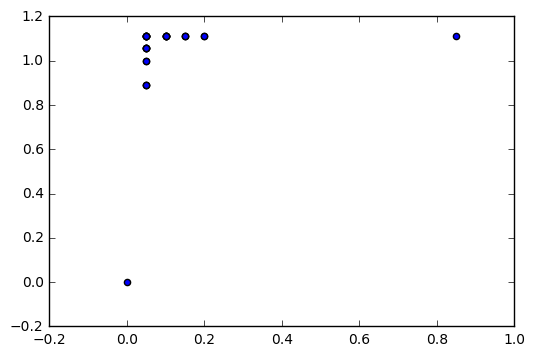

In [80]:
import matplotlib.pyplot as plt
import numpy as np

score = roc_pred
y = roc_true

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
print min_score , max_score
thr = np.linspace(min_score, max_score, 30)
FP=0
TP=0
N = sum(y)
P = len(y) - N

for (i, T) in enumerate(thr):
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0
plt.scatter(roc_x, roc_y)
plt.show()




In [87]:
softmax_pred_cls_np[:,0]

array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.])

In [88]:
from sklearn.metrics import confusion_matrix
roc_pred_list =list(softmax_pred_cls_np[:,0])
roc_true_list =list(roc_true)



In [92]:
cm=confusion_matrix(roc_true_list, roc_pred_list)
print cm

[[17  1]
 [ 0 20]]


In [85]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [66]:
softmax_pred_np=np.asarray(softmax_pred)
np_save_folder='/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/Softmax_np/'
np.save(np_save_folder+name,softmax_pred_np)

In [67]:
np.load('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/Softmax_np/0_0.npy')

array([[ 0.28212392,  0.71787608],
       [ 0.71789473,  0.28210527],
       [ 0.62942225,  0.37057775],
       [ 0.28238854,  0.71761143],
       [ 0.28182077,  0.71817923],
       [ 0.4516035 ,  0.54839647],
       [ 0.28369328,  0.71630675],
       [ 0.71634513,  0.2836549 ],
       [ 0.28230771,  0.71769226],
       [ 0.71389335,  0.28610662],
       [ 0.28190592,  0.71809405],
       [ 0.71589875,  0.28410128],
       [ 0.71771961,  0.28228033],
       [ 0.28247997,  0.71752   ],
       [ 0.7156415 ,  0.2843585 ],
       [ 0.71654803,  0.28345188],
       [ 0.71597075,  0.28402928],
       [ 0.28173211,  0.71826786],
       [ 0.28198841,  0.71801162],
       [ 0.71784627,  0.28215376],
       [ 0.71617758,  0.28382242],
       [ 0.28141966,  0.71858031],
       [ 0.31366456,  0.68633544],
       [ 0.71595985,  0.28404012],
       [ 0.65987861,  0.34012136],
       [ 0.28276071,  0.71723926],
       [ 0.55909795,  0.44090205],
       [ 0.28288627,  0.71711373],
       [ 0.28226629,

In [68]:
np.load('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/Softmax_np/2_4.npy')

array([[ 0.50941229,  0.49058771],
       [ 0.43891898,  0.56108105],
       [ 0.37799591,  0.62200403],
       [ 0.70078057,  0.29921952],
       [ 0.71415222,  0.28584781],
       [ 0.71756274,  0.28243729],
       [ 0.68068248,  0.31931755],
       [ 0.71232474,  0.28767523],
       [ 0.73285276,  0.26714724],
       [ 0.73301286,  0.26698714],
       [ 0.72139841,  0.27860162],
       [ 0.65489841,  0.34510159],
       [ 0.72141153,  0.2785885 ],
       [ 0.70857787,  0.29142213],
       [ 0.66585028,  0.33414972],
       [ 0.71356505,  0.28643492],
       [ 0.71167392,  0.28832608],
       [ 0.71821624,  0.28178376],
       [ 0.55373955,  0.44626039],
       [ 0.67995417,  0.32004589],
       [ 0.72010183,  0.27989817],
       [ 0.72032446,  0.27967557],
       [ 0.72601742,  0.27398258],
       [ 0.69325846,  0.30674154],
       [ 0.71389431,  0.28610569],
       [ 0.3472918 ,  0.65270823],
       [ 0.66359866,  0.33640125],
       [ 0.32483071,  0.67516929],
       [ 0.70924342,

In [69]:
pred=np.zeros([354,2])
for i in range(3):
    for j in range(5):
        pred+=np.load('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/Softmax_np/'+str(i)+'_'+str(j)+'.npy')

ValueError: operands could not be broadcast together with shapes (354,2) (38,2) (354,2) 

In [ ]:
pred=pred/15
len(pred)

In [ ]:
np.save('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/Softmax_np/pred',pred)

In [ ]:
np.mean(pred[0:4] , axis =0)


In [ ]:
np.mean(pred[4:18] , axis =0)


In [ ]:
np.mean(pred[18:21] , axis =0)

In [ ]:
np.mean(pred[21:27] , axis =0)

In [ ]:
np.mean(pred[27:29] , axis =0) #5

In [ ]:
np.mean(pred[29:32] , axis =0)#6

In [ ]:
np.mean(pred[32:35] , axis =0)#7

In [ ]:
np.mean(pred[35:38] , axis =0)#8

In [ ]:
np.mean(pred[38:49] , axis =0)

In [ ]:
np.mean(pred[49:52] , axis =0) #10

In [ ]:
np.mean(pred[52:53] , axis =0)#11

In [ ]:
np.mean(pred[53:65] , axis =0)

In [ ]:
np.mean(pred[65:74] , axis =0)

In [ ]:
np.mean(pred[74:77] , axis =0)

In [ ]:
np.mean(pred[74:83] , axis =0)#15

In [ ]:
np.mean(pred[83:85] , axis =0)

In [ ]:
np.mean(pred[85:87] , axis =0)

In [ ]:
np.mean(pred[87:89] , axis =0)

In [ ]:
np.mean(pred[89:92] , axis =0)

In [ ]:
np.mean(pred[92:95] , axis =0)#20

In [ ]:
np.mean(pred[95:97] , axis =0)#21

In [ ]:
np.mean(pred[97:103] , axis =0)

In [ ]:
np.mean(pred[103:109] , axis =0)

In [ ]:
np.mean(pred[109:110] , axis =0)

In [ ]:
np.mean(pred[110:113] , axis =0)

In [ ]:
np.mean(pred[113:130] , axis =0)

In [ ]:
np.mean(pred[130:135] , axis =0)

In [ ]:
np.mean(pred[135:138] , axis =0)

In [ ]:
np.mean(pred[138:140] , axis =0)

In [ ]:
np.mean(pred[140:148] , axis =0)

In [ ]:
np.mean(pred[148:154] , axis =0)

In [ ]:
np.mean(pred[154:158] , axis =0)

In [ ]:
np.mean(pred[158:170] , axis =0)

In [ ]:
np.mean(pred[170:196] , axis =0)

In [ ]:
np.mean(pred[196:203] , axis =0)

In [ ]:
np.mean(pred[203:208] , axis =0)

In [ ]:
np.mean(pred[208:215] , axis =0)

In [ ]:
np.mean(pred[215:217] , axis =0)

In [ ]:
np.mean(pred[217:219] , axis =0)

In [ ]:
np.mean(pred[219:224] , axis =0)

In [ ]:
np.mean(pred[224:252] , axis =0)

In [ ]:
np.mean(pred[252:256] , axis =0)

In [ ]:
np.mean(pred[256:259] , axis =0)

In [ ]:
np.mean(pred[259:271] , axis =0)

In [ ]:
np.mean(pred[271:274] , axis =0)

In [ ]:
np.mean(pred[274:276] , axis =0)

In [ ]:
np.mean(pred[276:282] , axis =0)

In [ ]:
np.mean(pred[282:284] , axis =0)

In [ ]:
np.mean(pred[284:289] , axis =0)

In [ ]:
np.mean(pred[289:292] , axis =0)

In [ ]:
np.mean(pred[292:297 ], axis =0 )

In [ ]:
np.mean(pred[297:307] , axis =0)

In [ ]:
np.mean(pred[307:309] , axis =0)

In [ ]:
np.mean(pred[309:313] , axis =0)

In [ ]:
np.mean(pred[313:319] , axis =0)

In [ ]:
np.mean(pred[319:321] , axis =0)

In [ ]:
np.mean(pred[321:325] , axis =0)

In [ ]:
np.mean(pred[321:334] , axis =0)

In [ ]:
np.mean(pred[334:336] , axis =0)

In [ ]:
np.mean(pred[336:342] , axis =0)

In [ ]:
np.mean(pred[342:347] , axis =0)

In [ ]:
np.mean(pred[347:352] , axis =0)